In [10]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)


In [11]:
## six communities
# -135.4519	58.1122, Hoonah (PAOH) 
# -135.3277	59.4538, Skagway (PAGY)
# -135.8894, 59.3988, Klukwan
# -139.671	59.5121, Yakutat (PAYA)
# -133.1358, 55.4769, Craig
# -132.4009, 55.5400, Kasaan

xs = [-135.4519, -135.3277, -135.8894, -139.671, -133.1358, -132.4009]
ys = [58.1122, 59.4538, 59.3988, 59.5121, 55.4769, 55.5400]
lbl1 = ['Hoonah', 'Skagway', 'Klukwan', 'Yakutat', 'Craig', 'Kasaan']
lbl_align = ['center', 'left', 'right', 'center', 'right', 'left'] # where the labels go

## closest station
# -135.4519	58.1122, Hoonah (PAOH) 
# -135.3277	59.4538, Skagway (PAGY)
# -135.5117	59.2429, Haines (PAHN)
# -139.671	59.5121, Yakutat (PAYA)
# -133.076	55.5792, Klawock (PAKW)
# -131.7117	55.3567, Ketchikan (PAKT)
xs2 = [-135.4519, -135.3277, -135.5117, -139.671, -133.076, -131.7117]
ys2 = [58.1122, 59.4538, 59.2429, 59.5121, 55.5792, 55.3567]
lbl2 = ['PAOH', 'PAGY', 'PAHN', 'PAYA', 'PAKW', 'PAKT']

ext1 = [-140.5, -130., 54., 61.] # extent of SEAK 
ext1 = [-165., -130., 54., 62.] # extent of South southeast coast
ext1 = [-175., -151., 54., 72.] # extent of SEAK 

In [12]:
# Set up projection
datacrs = ccrs.PlateCarree()  ## the projection the data is in
mapcrs = ccrs.PlateCarree() ## the projection you want your map displayed in

# Set tick/grid locations
xticks = np.arange(ext1[2],ext1[3]+0.5,0.5)
yticks = np.arange(ext1[0]+0.5,ext1[1]+0.5,0.5)

In [13]:
def plot_terrain(ax, ext):
    fname = '/work/bkawzenuk_work/Maps/data/ETOPO1_Bed_c_gmt4.grd'
    datacrs = ccrs.PlateCarree()
    grid = xr.open_dataset(fname)
    grid = grid.where(grid.z > 0) # mask below sea level
    grid = grid.sel(x=slice(ext[0], ext[1]), y=slice(ext[2], ext[3]))
    cs = ax.pcolormesh(grid.x, grid.y, grid.z, vmin=0, vmax=4000,
                       cmap='rainbow', rasterize=True, transform=datacrs, alpha=0.7)
    
    return ax




def cmap(name):
    
    data = np.array(colors[name])
    data = data / np.max(data)
    cmap = ListedColormap(data, name=name)
    bnds = levels
    norm = mcolors.BoundaryNorm(bnds, cmap.N)
    return cmap, norm, bnds

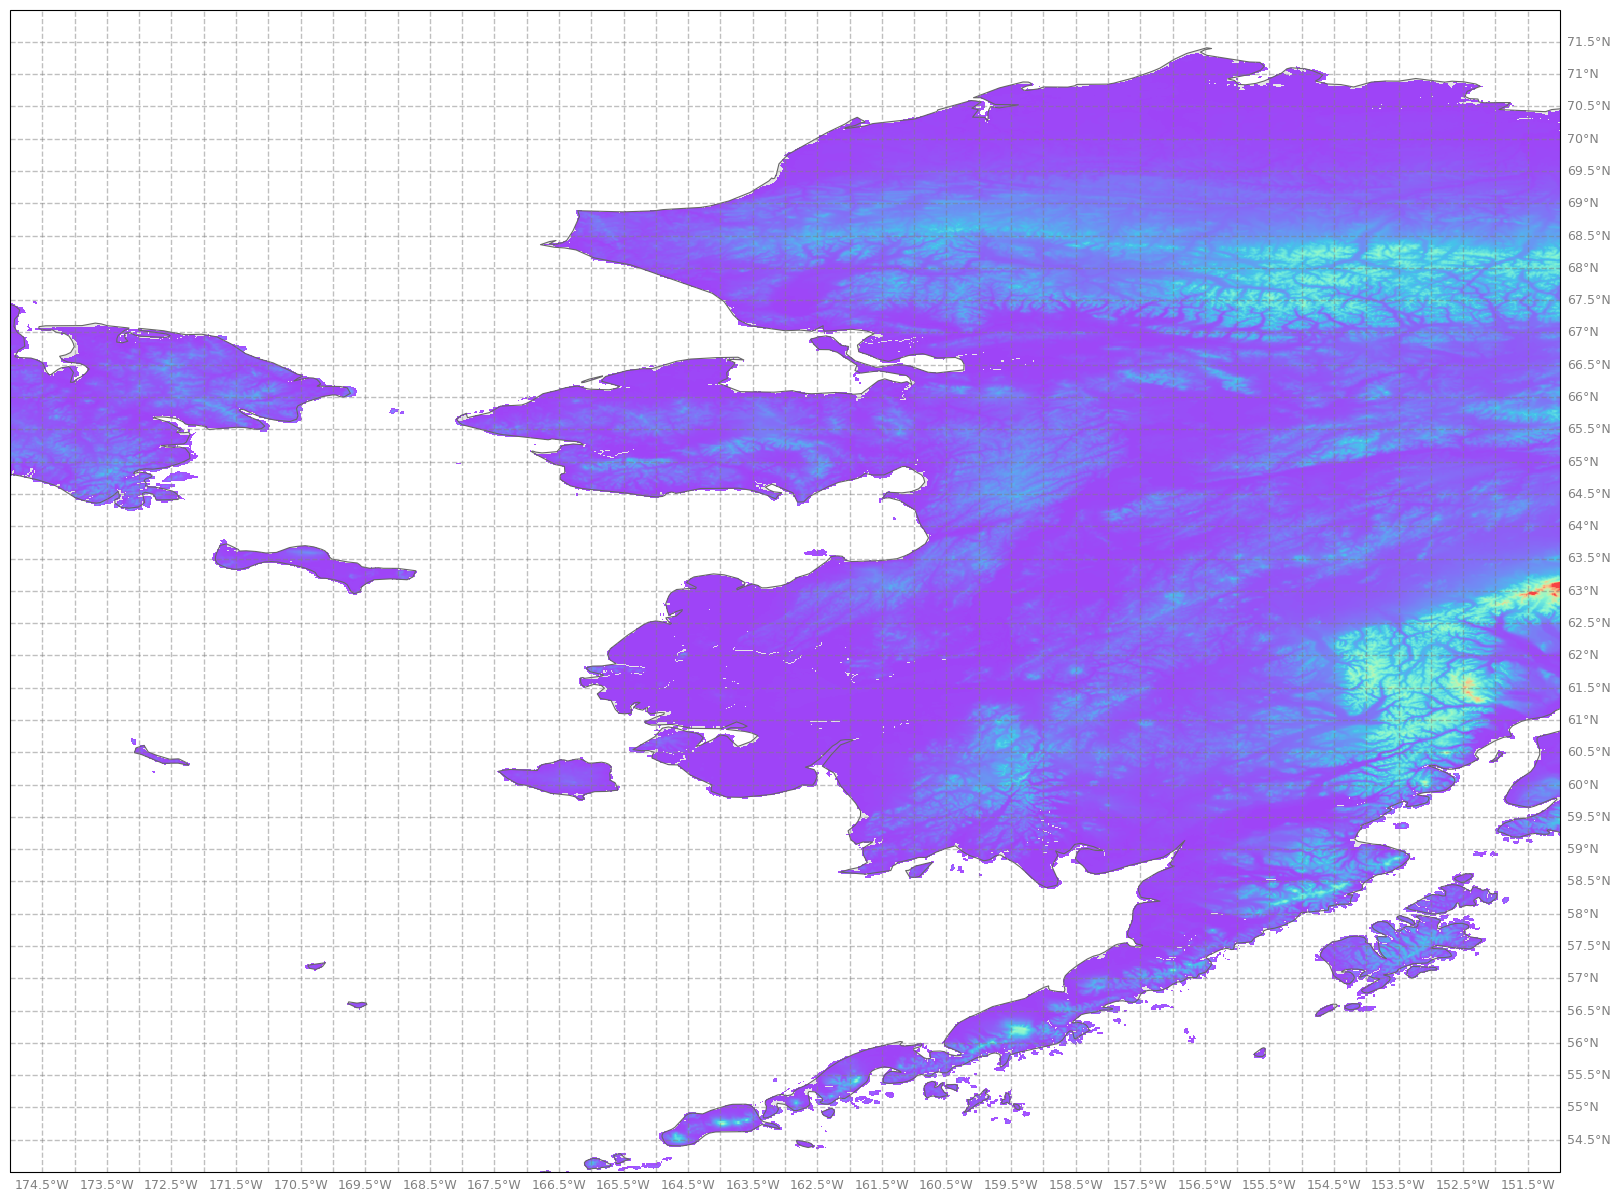

In [14]:
def main():
    fig = plt.figure(figsize=(20, 20))
    # ax = fig.axes(projection=mapcrs)
    ax = fig.add_subplot(111, projection=mapcrs)
    ax.set_extent(ext1, crs=datacrs)
    
    # Add map features (continents and country borders)
    ax.add_feature(cfeature.LAND, facecolor='0.9')      
    ax.add_feature(cfeature.BORDERS, edgecolor='0.4', linewidth=0.8)
    ax.add_feature(cfeature.COASTLINE, edgecolor='0.4', linewidth=0.8)

    ## Add ERA-Interim Gridlines and Labels
    gl = ax.gridlines(crs=datacrs, draw_labels=True,
                      linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False
    gl.left_labels = False
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator(yticks)
    gl.ylocator = mticker.FixedLocator(xticks)
    gl.xformatter = LongitudeFormatter()
    gl.yformatter = LatitudeFormatter()
    gl.xlabel_style = {'size': 9, 'color': 'gray'}
    gl.ylabel_style = {'size': 9, 'color': 'gray'}
    
    # ax.set_yticks(yticks, crs=ccrs.PlateCarree()) # add external yticks
    # plt.yticks(color='w', size=1) # hack: make the ytick labels white so they don't show up
    # ax.set_xticks(xticks, crs=ccrs.PlateCarree()) # add external yticks
    # plt.xticks(color='w', size=1) # hack: make the ytick labels white so they don't show up
    
    
#     ## Add ERA5 Gridlines
#     gl = ax.gridlines(crs=datacrs, draw_labels=True,
#                       linewidth=0.75, color='gray', alpha=0.5, linestyle='--')
#     gl.xlines = True
#     gl.ylines = True
#     gl.xlocator = mticker.FixedLocator(np.arange(ext1[2],ext1[3]+0.25,0.25))
#     gl.ylocator = mticker.FixedLocator(np.arange(ext1[0]+0.25,ext1[1]+0.25,0.25))
#     gl.top_labels = False
#     # gl.bottom_labels = False
#     gl.left_labels = False
#     # gl.right_labels=True
#     gl.xformatter = LongitudeFormatter()
#     gl.yformatter = LatitudeFormatter()
#     gl.xlabel_style = {'size': 9, 'color': 'gray'}
#     gl.ylabel_style = {'size': 9, 'color': 'gray'}
    
    # need this to fix annotate transform
    transform = datacrs._as_mpl_transform(ax)
    
    ## Plot the locations of the focus communities
    # zip joins x and y coordinates in pairs
    # for x,y,z,ha in zip(xs,ys, lbl1, lbl_align):

        # Plot Location of pts
        # ax.plot(x, y, 'ro', markersize=6, transform=datacrs)

        # ax.annotate(z, # this is the text
        #            (x,y), # these are the coordinates to position the label
        #             textcoords="offset points", # how to position the text
        #             xytext=(0,12), # distance from text to points (x,y)
        #             ha=ha, # horizontal alignment can be left, right or center
        #             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="k", lw=0.5, alpha=0.8),
        #             xycoords=transform,
        #             zorder=102,
        #             fontsize=14)
        
    plot_terrain(ax, ext1)    
    
    plt.show()


if __name__ == '__main__':
    main()